In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2024-04-22 08:33:15--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-04-22 08:33:16 ERROR 403: Forbidden.



In [4]:
df = pd.read_csv('/content/drive/MyDrive/PyTorch Projects/spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#rename columns
df.columns = ['labels', 'data']

In [9]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#creating binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [11]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
df_train, df_test = train_test_split(df, test_size=.33)

In [13]:
df_train.shape, df_test.shape

((3733, 3), (1839, 3))

In [14]:
# 0 = padding
idx = 1
word2idx = {'<PAD>': 0}

In [15]:
#tokenization
for i, row in df_train.iterrows():
  tokens = row['data'].lower().split()
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = idx
      idx+=1

In [16]:
word2idx

{'<PAD>': 0,
 'pathaya': 1,
 'enketa': 2,
 'maraikara': 3,
 "pa'": 4,
 'ya': 5,
 'had': 6,
 'just': 7,
 'now.onion': 8,
 'roast.': 9,
 'ìï': 10,
 'got': 11,
 'wat': 12,
 'to': 13,
 'buy': 14,
 'tell': 15,
 'us': 16,
 'then': 17,
 'ì_': 18,
 'no': 19,
 'need': 20,
 'come': 21,
 'in': 22,
 'again.': 23,
 'happy': 24,
 'new': 25,
 'year': 26,
 'u': 27,
 'too!': 28,
 "i'll": 29,
 'text': 30,
 'now!': 31,
 'all': 32,
 'creepy': 33,
 'like': 34,
 'so': 35,
 'he': 36,
 "won't": 37,
 'think': 38,
 'that': 39,
 'we': 40,
 'forgot': 41,
 'you': 42,
 'are': 43,
 'a': 44,
 'å£1000': 45,
 'winner': 46,
 'or': 47,
 'guaranteed': 48,
 'caller': 49,
 'prize,': 50,
 'this': 51,
 'is': 52,
 'our': 53,
 'final': 54,
 'attempt': 55,
 'contact': 56,
 'you!': 57,
 'claim': 58,
 'call': 59,
 '09071517866': 60,
 '150ppmpobox10183bhamb64xe': 61,
 'did': 62,
 'download': 63,
 'the': 64,
 'fring': 65,
 'app?': 66,
 'aiyar': 67,
 'sorry': 68,
 'lor': 69,
 '2': 70,
 'u...': 71,
 'i': 72,
 'will': 73,
 'cal': 74,
 

In [17]:
len(word2idx)

10546

In [18]:
#covert data into word indices
train_sentences_as_int = []
for i, row in df_train.iterrows():
  tokens = row['data'].lower().split()
  sentence_as_int = [word2idx[token] for token in tokens]
  train_sentences_as_int.append(sentence_as_int)

In [19]:
test_sentences_as_int = []
for i, row in df_test.iterrows():
  tokens = row['data'].lower().split()
  sentence_as_int = [word2idx[token] for token in tokens if token in word2idx]
  test_sentences_as_int.append(sentence_as_int)

In [20]:
len(train_sentences_as_int), len(test_sentences_as_int)

(3733, 1839)

In [21]:
def data_generator(X, y, batch_size = 32):
  X, y = shuffle(X, y)
  n_batches = int(np.ceil(len(y)/ batch_size))
  for i in range(n_batches):
    end = min((i + 1) * batch_size, len(y))

    X_batch = X[i * batch_size : end]
    y_batch = y[i * batch_size : end]

    #pad X_batch to be N x T
    max_len = np.max([len(x) for x in X_batch])
    for j in range(len(X_batch)):
      x = X_batch[j]
      pad = [0] * (max_len - len(x))
      X_batch[j] = pad + x

    #convert to tensor
    X_batch = torch.from_numpy(np.array(X_batch)).long()
    y_batch = torch.from_numpy(np.array(y_batch)).long()

    yield X_batch, y_batch

In [22]:
for inputs, targets in data_generator(train_sentences_as_int, df_train.b_labels):
  print("inputs:", inputs, "shape:", inputs.shape)
  print("targets:", targets, "shape:", targets.shape)
  break

inputs: tensor([[    0,     0,     0,  ...,  2083,  3041, 10490],
        [    0,     0,     0,  ...,  2687,  1359,  2688],
        [    0,     0,     0,  ...,  5807,  1226,  5808],
        ...,
        [    0,     0,     0,  ...,   880,    13,  5712],
        [    0,     0,     0,  ...,    18,  1444,   887],
        [    0,     0,     0,  ...,  1401,  1402,  1403]]) shape: torch.Size([32, 36])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]) shape: torch.Size([32])


In [23]:
for inputs, targets in data_generator(test_sentences_as_int, df_test.b_labels):
  print("inputs:", inputs, "shape:", inputs.shape)
  print("targets:", targets, "shape:", targets.shape)
  break

inputs: tensor([[   0,    0,    0,  ...,   13, 1259,  223],
        [   0,    0,    0,  ...,  128, 3541, 2244],
        [  36, 2212,   86,  ...,  301,  346,  568],
        ...,
        [   0,    0,    0,  ...,   42,  323,  355],
        [   0,    0,    0,  ..., 2498,  345,  659],
        [   0,    0,    0,  ..., 5368,  278, 5369]]) shape: torch.Size([32, 33])
targets: tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1]) shape: torch.Size([32])


In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [26]:
#Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size = self.D,
        hidden_size = self.M,
        num_layers= self.L,
        batch_first=True
    )
    self.fc = nn.Linear(self.M, self.K)

  def forward(self, X):
    #initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    #embedding layer
    out = self.embed(X)

    #get RNN unit output
    out, _ = self.rnn(out, (h0, c0))

    #max pool
    out, _ = torch.max(out, 1)

    out = self.fc(out)
    return out

In [27]:
model = RNN(len(word2idx), 20, 15, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(10546, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [28]:
#Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [30]:
train_gen = lambda : data_generator(train_sentences_as_int, df_train.b_labels)
test_gen = lambda : data_generator(test_sentences_as_int, df_test.b_labels)

In [31]:
# A function to encapsualte the training loop
def  batch_gd(model, criterion, optimizer, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_gen():
      targets = targets.view(-1, 1).float()
      inputs, targets = inputs.to(device), targets.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = criterion(outputs, targets)

      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    train_loss = np.mean(train_loss)

    test_loss = []
    for inputs, targets in test_gen():
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    #Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss: .4f}, \
    Test Loss: {test_loss: .4f}, Duration: {dt}')
  return train_losses, test_losses

In [32]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, 15)

Epoch 1/15, Train Loss:  0.5773,     Test Loss:  0.4177, Duration: 0:00:01.878173
Epoch 2/15, Train Loss:  0.3523,     Test Loss:  0.3283, Duration: 0:00:01.526623
Epoch 3/15, Train Loss:  0.2797,     Test Loss:  0.2680, Duration: 0:00:01.514378
Epoch 4/15, Train Loss:  0.2109,     Test Loss:  0.2005, Duration: 0:00:01.879174
Epoch 5/15, Train Loss:  0.1585,     Test Loss:  0.1570, Duration: 0:00:01.920451
Epoch 6/15, Train Loss:  0.1203,     Test Loss:  0.1424, Duration: 0:00:01.611314
Epoch 7/15, Train Loss:  0.0960,     Test Loss:  0.1174, Duration: 0:00:01.548495
Epoch 8/15, Train Loss:  0.0739,     Test Loss:  0.1042, Duration: 0:00:01.486470
Epoch 9/15, Train Loss:  0.0611,     Test Loss:  0.0950, Duration: 0:00:01.476296
Epoch 10/15, Train Loss:  0.0503,     Test Loss:  0.1028, Duration: 0:00:01.515574
Epoch 11/15, Train Loss:  0.0428,     Test Loss:  0.0879, Duration: 0:00:01.487605
Epoch 12/15, Train Loss:  0.0358,     Test Loss:  0.0825, Duration: 0:00:01.694713
Epoch 13/15, 

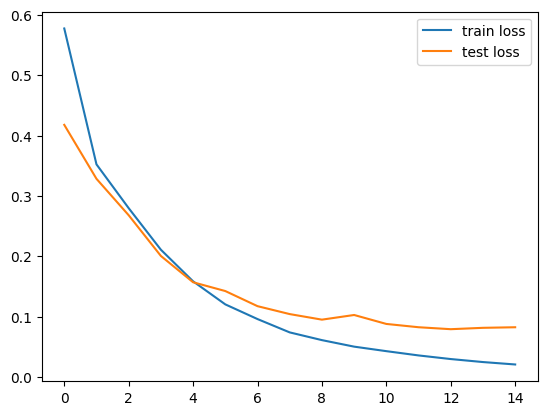

In [34]:
#Plot the train loss  and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [35]:
# Accuracy
n_correct = 0.
n_total = 0.
for inputs, targets in train_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  outputs  = model(inputs)

  predictions = (outputs > 0)

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for inputs, targets in test_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  outputs  = model(inputs)

  predictions = (outputs > 0)

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

Train acc: 0.9960, Test acc: 0.9761
